<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Data_Processing_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#downloading_data">Python Usfull Library</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
    </ol>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **2-Data Sets**

## **Faker [10]**

We might come across a situation where we need to generate some test data or use some dummy data in our analysis. One way to get dummy data is by using the Faker library. This will generate fake data for you very quickly when you need to.

**Installation**


In [ ]:
!pip install faker


**Example**

In [3]:
from faker import Faker
fake = Faker()

In [ ]:
# Generating fake email
print (fake.email()) 
# Generating fake country name
print(fake.country()) 
# Generating fake name
print(fake.name()) 
# Generating fake text
print(fake.text()) 
# Generating fake lat and lon
print(fake.latitude(), fake.longitude())
# Generating fake url
print(fake.url()) 
# Generating fake profile
print(fake.profile())
# Generating random number
print(fake.random_number())

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

# **2-Python Usufull library**[10] 

## **Numerizer**

Amazing library to convert text numerics into int and float. Useful library for NLP projects. For more details, please check PyPI and this github repo.

In [ ]:
!pip install numerizer


**Example**

In [ ]:
#importing numerize library
from numerizer import numerize 
from numerizer import numerize
#examples
a = int(numerize('Three')) 
print(a) 
print(numerize('five thousand two hundred and twenty')) 


## **EMOT [10]**

Collecting and analyzing data on emojis as well as emoticons give useful insights, especially in sentiment analysis. An emoji is an image small enough to insert into text that expresses an emotion or idea. An emoticon is a representation of a human facial expression using only keyboard characters such as letters, numbers, and punctuation marks.
emot helped us to convert the emojis and emoticons into words. For more details on this library, please check this Github repo. It has a good collection of emoticons and emojis with the corresponding words.

In [ ]:
!pip install emot


In [ ]:
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
# Example
text1 = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
convert_emojis(text1)

In [ ]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text# Example
text = "Hello :-) :-)"
convert_emoticons(text)

# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [14]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [15]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

In [ ]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name','last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

missing_cols(airbnb)

## **3.3-Dropping the row**

If you want to remove rows, you do so using dropna . I’m not going to do that because there are no missing values in price.

In [ ]:
# remove rows with missing values in price
airbnb['price'].dropna(inplace=True)

# **4-Convert target variable into binary Form**

In [16]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem** [8]


Classification is one of the most common machine learning problems. One of the common issues found in datasets that are used for classification is imbalanced classes issue. Generally, we expect the labels to be relatively even distributed. In reality, the samples we can get maybe unsatisfactory.

Take a binary classification problem for example, we might encounter too few positive samples in the training dataset, called minority class. And most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important. Such an imbalanced dataset can be addressed by sampling techniques. There are mainly three types of sampling techniques: **Oversampling**, **Undersampling** and **Synthetic Sampling**.

**Why Imbalanced dataset is bad?**

So why does imbalance lead to poor model performance? Because any algorithm cannot obtain enough information from a class with a small sample size to make accurate predictions. The uneven distribution of the corresponding variables reduces the accuracy of the algorithm, and the prediction accuracy for small classes will be very low. The algorithm itself is error-driven, that is, the goal of the model is to minimize the overall error, and the contribution of small classes to the overall error is very low. The algorithms themselves assume that the class distribution of the data set is balanced, and they may also assume that different classes of errors bring the same loss.


**Oversampling**


This method mainly deals with small classes. Use repeated observations to balance the data. There will not be any information loss using this method, but the addition of small-type repeated samples will easily lead to over-fitting, and the calculation time and storage overhead will also increase.

![](https://drive.google.com/uc?export=view&id=1Zze6DH82-UqfgfYK8J4gerDY18LbH7rO)

**Undersampling**

This method is mainly to deal with large categories. Use to reduce the number of observations in large categories to balance the data set. It is suitable when the overall data set is large, and this method can also reduce the calculation time and storage overhead (the training set samples are less). It is also possible to combine the two methods of oversampling and undersampling. The large class uses undersampling without replacement, and the small class uses oversampling with replacement.

![](
https://drive.google.com/uc?export=view&id=10OLxqUKqVGd_Uknw-Griz4Ultd9sjMYM)

**Synthetic Sampling**


The synthetic data sampling method uses artificial data instead of repeating the original observations to solve the imbalance. Among those algorithms, ASMOTE (Synthetic Minority Oversampling Technique) is the most common a data sampling technique.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.
The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.
A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

![](https://drive.google.com/uc?export=view&id=1TwyAC1SK2t7fXcdsin6aNGNq0pT48kke)

## **5.1 Check Imbalanced Problem in Data**

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **Data resample**

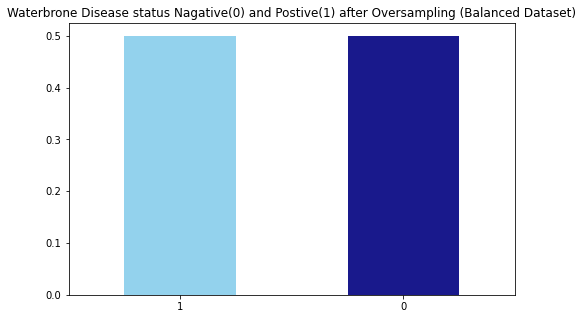

In [18]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

## **SMOTE** [3,4]

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

**Borderline-SMOTE**

To change the number of values in class 1, there are two possible methods: **random undersampling **(reduces the number of entries from the majority class) and **synthetic oversampling** (synthetically generating new entries for the minority class).

Because we want to provide our model with as much data as possible, we will use a technique called **Borderline-SMOTE**

**Borderline-SMOTE**(Borderline Synthetic Minority Oversampling Technique). The reason that Borderline-SMOTE was used as opposed to SMOTE is that it takes synthetically generates data in between different elements in the minority class, while ignoring outliers. Outliers can be defined as features which neighbour more majority points, than minority ones.

Below is the code to apply Borderline-SMOTE. It is important to only balance the training data, as the test series must reflect real-world field data.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE


In [ ]:
X_train_Before= X_train

In [ ]:
y_train_Before= y_train

In [ ]:
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_train, y_train = borderlineSMOTE.fit_resample(X_train_Before,y_train_Before)

#**6- Missing Values** 

## **Missingo**[10]
It is widespread to find missing values in a real-world dataset. We need to understand the missing values before imputing. Missingo offers a quick and helpful way to visualize the missing values.

**Installation**


In [ ]:
!pip install missingno


**Usage**


In [ ]:
# importing necessary libraries
import pandas as pd 
import missingno as mi
# reading the dummy dataset
#data = pd.read_excel(“dummy.xlsx”)
# checking missing values
oversampled.isnull().sum()

Dummy dataset has 11 rows and four columns. Missing values presented in Min, Temp, and city variables. We can visualize using a bar graph and matrix. It also supports heatmap, dendrogram. For more details, please check this Github repository.

Visualizing missing value using bar graph
Visualizing missing value using matrix


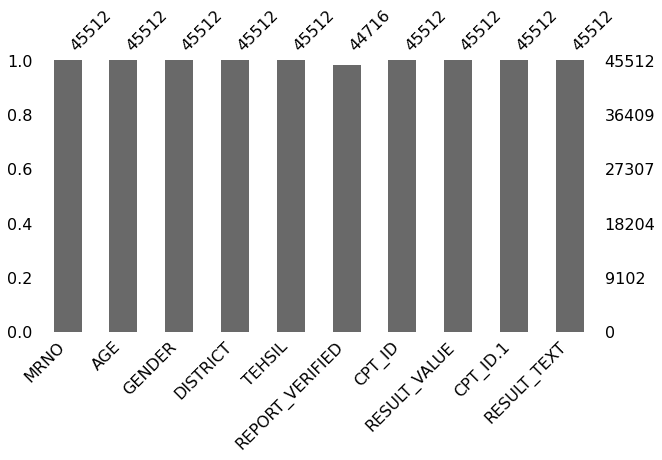

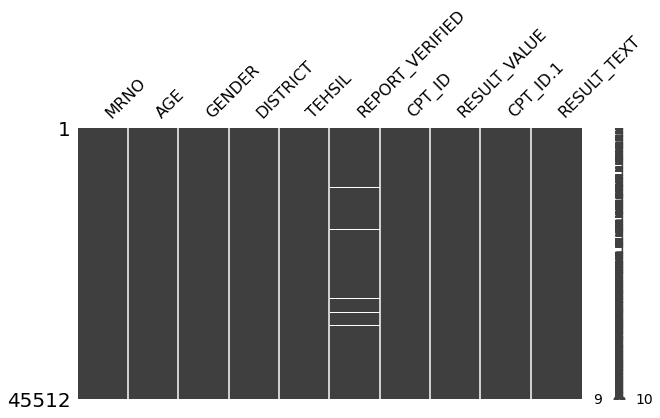

In [23]:
#Visualizing using missingo
print('Visualizing missing value using bar graph')
mi.bar(oversampled, figsize = (10,5))
print('Visualizing missing value using matrix')
mi.matrix(oversampled, figsize = (10,5) )

## **6.1 Why do We Need to Fill Missing Values in a Dataset?**

Sometimes the dataset we use to solve a problem contains a lot of missing values that can adversely affect the performance of a machine learning model. A dataset with a lot of missing values can give us wrong information. So if we have missing values in a dataset, here are some strategies we can choose to deal with them:

- Removing the whole row which contains missing values
- Filling the missing values according to the other known values

The first strategy is to remove the entire row containing a missing value. This is not a bad idea, but it can only be considered when the data is very large. If removing missing values results in a data shortage, then this will not be an ideal dataset for any data science task. This is where the second strategy comes in, which is to fill in the missing values according to the other known values. This strategy can be considered in any type of dataset.

So this is why we need to fill the missing values in a dataset. In the section below, I will take you through a tutorial on how to fill in missing values in a dataset using Python.


## **6.2- Check missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


If you want to see missing values for all columns, use this command:

In [ ]:
oversampled.isnull().sum()


This gives you the percentage of missing values in each of the columns. Knowing the percentage can be useful in determining whether you should drop the column.

In [ ]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))

In [ ]:
perc_missing(oversampled)


REPORT_VERIFIED => 1.75%


**Heatmap of missing values**

Heatmaps are also useful to visualize your missing values, in particular at which point of the data do missing values exists.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(oversampled.isnull(), yticklabels=False, cmap='viridis', cbar=False)

## **6.3 Fill Missing Values in a Dataset using Python**

The scikit-learn library in Python offers the **SimpleImputer()** class which can be used for filling the missing values based on:

- Mean of the known values
- Median of the known values
- Most frequent value among the known values

So let’s go through all these methods one by one for filling the missing values of a dataset. I will first create a very simple dataset with some missing values:


In [ ]:
import numpy as np
data = np.array([[10, np.nan, 8], 
                 [9, 8, np.nan], 
                 [7, 10, 9]])

In [ ]:
print(data)


[[10. nan  8.]
 [ 9.  8. nan]
 [ 7. 10.  9.]]


Here is how you can use the Mean of the other known values for filling the missing values:



In [ ]:
# Filling Values with mean
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
data1 = mean_values.fit_transform(data)

In [ ]:
print(data1)


[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


Here is how you can use the Median of the other known values for filling the missing values:



In [ ]:
# Filling Values with median
from sklearn.impute import SimpleImputer
median_values = SimpleImputer(strategy='median')
data2 = median_values.fit_transform(data)
print(data2)

[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


Here is how you can use the most frequent value among the other known values for filling the missing values:

In [ ]:
# Filling values with most frequent values
from sklearn.impute import SimpleImputer
most_frequent = SimpleImputer(strategy='most_frequent')
data3 = most_frequent.fit_transform(data)
print(data3)

[[10.  8.  8.]
 [ 9.  8.  8.]
 [ 7. 10.  9.]]


**Imputing**

For imputing, there are 3 main techniques shown below.

- fillna — filling in null values based on given value (mean, median, mode, or specified value)
- bfill / ffill — stands for backward fill and forward fill (filling in missing values based on the value after or before the column.)
- Simple Imputer — Sk-learn’s built-in function that imputes missing values (commonly used alongside a pipeline when building ML models)

Below you can find examples of applying these methods to the price column if it had missing values.

In [ ]:
# imputing price with mean
price_mean_value = round(airbnb['price'].mean(), 2)
airbnb['price'].fillna(price_mean_value, inplace=True)

# imputing price with median
price_median_value = round(airbnb['price'].median(), 2)
airbnb['price'].fillna(price_median_value, inplace=True)

# imputing with bfill or ffill
airbnb['price'].bfill(inplace=True)
airbnb['price'].ffill(inplace=True)

# imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb[['price']] = imr.fit_transform(airbnb[['price']])

**Replace**

To replace values, the fillna function is also used.

You define the value you want to replace in the key, and the substitute in the value — {column_name: replacement_for_NA}

Here are examples for replacing values in the columns reviews_per_month and name


In [ ]:
# replace null values in reviews_per_month with 0 
airbnb.fillna({'reviews_per_month':0}, inplace=True)

missing_cols(airbnb)

In [ ]:
# replace null values in name with 'None'
airbnb.fillna({'name':'None'}, inplace=True)

missing_cols(airbnb)

# **7-Inconsistent data/Irrelevant features**

Inconsistent data refers to things like spelling errors in your data, column names that are not relevant to the data, the wrong data type, etc.
Here are a couple examples for dealing with these issues.

**Remove rows based on regex**


Let’s say you want to remove rows that contain a certain word. For my example, I chose the word noisy/Noisy as my target, and I used the function str.contains() to find the indexes that contain those rows.

Then, using the drop function, and setting axis to index, I can supply the indexes I have and drop those rows.
Printing out the number of rows, you can see it reduced by three.

In [ ]:
# example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb[airbnb['name'].str.contains(target, regex=True)]

# show rows that contains the word noisy
print(noisy_airbnb['name'])

# get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

# print(index_to_drop)

In [ ]:
# drop rows based on index
airbnb.drop(index_to_drop, axis='index', inplace=True)

print(len(airbnb_ori))
print(len(airbnb))

**Spelling errors in categorical data**


Sometimes your categorical data might have spelling errors or different capitalization that can mess up your categorization.

I will be using the neighbourhood_group column as an example.

In [ ]:
airbnb['neighbourhood_group'].value_counts()

You can see the different types of neighborhoods are already well categorized. But what if it wasn’t?

To simulate a scenario where some of the data had capitalization or spelling issues, I sampled 2 rows from the data, and replaced them with the wrong spelling.

You can see now how the categorization is messed up. “Manhattan” and “manhatann” refer to the same thing, but they aren’t in the same category because of capitalization. Same goes for “brookln” due to spelling issues.

We can fix this by using the replace function in pandas. We first give the values that are wrong, then supply the right ones. Notice the values have to match each other in the list, i.e. “manhatann” → “Manhattan”.

In [ ]:
random_index = airbnb.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()

In [ ]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb['neighbourhood_group'].value_counts()

**Renaming columns**


There are cases where you want to rename your columns as well.

You can do this by using a dictionary, setting the key as the original column name, and the value as the new column name.

Then using the rename function we give our dictionary and voila, the columns names have changed.

In [ ]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb.rename(columns=new_names, inplace=True)
airbnb.head()

The dataset that I am using here does not have columns names, so let’s give the most appropriate names to these columns:

In [ ]:
data.columns = ['user_id', 'product_id','ratings','timestamp']

**Converting to DateTime**

If you have data that should be a datetime object, but are strings, you can use the pd.to_datetime, and pass it the format that represents your data.

Just like that, the column has converted into a datatime data type.

In [ ]:
airbnb_ori['last_review'] = pd.to_datetime(airbnb_ori['last_review'], format='%Y-%m-%d')
airbnb_ori['last_review'].dtype.type

**Duplicates**


There are cases where your rows have duplicate values, this could’ve happened due to some mishaps in your data collection.

To find out if you have duplicated values, call duplicated().any() on your data frame, and if it’s true, use the drop_duplicates function

You can also specify columns where you want to remove duplicate values like below.

In [ ]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()
False

**Change data type to reduce memory**


Changing data type is common if you want to reduce memory usage.

To do so, you can use the astype(‘dtype’) function where you specify the dtype you want.

In my example, I changed the data type for the host_id column from int64 to int32

Observe the memory before changing the data type

In [ ]:
airbnb.info()

In [ ]:
airbnb['host_id'] = airbnb['host_id'].astype('int32')
airbnb.info()

You can see the memory reduced from 6.5+ to 6.3+ MB.

# **8-Encoding**

**Machine Learning type of Data**[9]

Data Science is the art and science of solving real-world problems and making data-driven decisions. It primarily deals with all kinds of structured or unstructured data. Data, broadly, can be divided into two types i.e., Numerical and Categorical. Most of the data science models are equipped to work with **numerical data**; however, things get interesting when we have to deal with **Categorical data**.

**What is Categorical data?**[9]

Categorical data is a form of data that takes on values within a finite set of discrete classes. It is difficult to count or measure categorical data using numbers and therefore they are divided into categories. An example of categorical data would be Gender of a person. It can only take values between Male, Female, and Others.
There are two types of categorical variables:

**I. Ordinal Variables:**


These variables maintain a natural order in their class of values. If we consider the level of education then we can easily sort them according to their education tag in the order of High School < Under-Graduate<post-Graduate < PhD. The review rating system can also be considered as an ordinal data type where 5 stars is definitely better than 1 star.

I**I. Nominal Variables:**

These variables do not maintain any natural/logical order. The color of a car can be considered as Nominal Variable as we cannot compare the color with each other. It is impossible to state that “Red” is better than “Blue” (subjective!). Similarly, Gender is a type of Nominal Variable as again we cannot differentiate between Male, Female, and Others.

**Encoding Categorical Data:**[9]


Most of the Machine learning algorithms are designed to work with numeric data. Hence, we need to convert Categorical(text) data into numerical data for model building. There are multiple encoding techniques to convert categorical data into numerical data. Let’s look at some of them.

When working on some datasets, we found that some of the features are categorical, if we pass that feature directly to our model, our model can't understand those feature variables. We all know that machines can't understand categorical data. Machines require all independent and dependent variables i.e input and output features to be numeric. This means that if our data contain a categorical variable, we must have to encode it to the numbers before we fit our data to the model.

Models only work with numerical values. For this reason, it is necessary to convert the categorical values of the features into numerical ones, So the machine can learn from those data and gives the right model. This process of converting categorical data into numerical data is called **Encoding** [6]

There are multiple ways of encoding techniques to deal with these variables.

The two most popular techniques of encoding are,


## **Nominal Encoding [7]**


When we have a feature where variables are just names and there is no order or rank to this variable's feature.For example: City of person lives in, Gender of person, Marital Status, etc…




In the above example, We do not have any order or rank, or sequence. All the variables in the respective feature are equal. We can't give them any orders or ranks. Those features are called Nominal features.


![](https://drive.google.com/uc?export=view&id=1EzEpCh6IEsZ0RKlDb_8c0fX376-M61ny)

## **Ordinal Encoding [7]**

Ordinal Encoding primarily encodes ordinal categories into ordered numerical values. Ordinal encoding maps each unique category value to a specific numerical value based on its order or rank. Consider the education column in the given data frame. Here, we define the ordering of the categories when creating an ordinal encoder using sklearn. so, in the example, we arrange the order inside the categories as a list in ascending order. First, we have the High School followed by Associate,Master, and then Ph.D. at the end.[9]

When we have a feature where variables have some order/rank.


![](https://drive.google.com/uc?export=view&id=1G1oAtnnuIuAApxdPPU80679T8rtDpntH)

For example: Student’s performance, Customer’s review, Education of person, etc…

In the above example, we have orders/ranks/sequences. We can assign ranks based on student's performance, based on feedback given by customers, based on the highest education of the person. Those features are called Ordinal features.

[OrdinalEncoder(categories=[[‘HS’, ‘AS’, ‘M.S’, ‘Ph.D.’]])]


In [ ]:
df['Education'].unique()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['HS', 'AS', 'M.S','Ph.D']])
df['Education'] = ordinal.fit_transform(df[['Education']])
df.head()

![](
https://drive.google.com/uc?export=view&id=1jnxgK8GKTX1HyWXyOLDgqmYQqns98njI)

The ordinal encoder is the most suitable option for encoding ordinal variables. It helps the machine learning model to establish a relationship between a categorical column and the target column. For example, if we want to predict the salary of an employee, it would depend on different features, and education level would be one of those features. Now, logically the one with Ph.D. will have a better salary than the one with a high school degree. so, the model will learn that a Ph.D. with a value of 3 in the data frame weighs more than the one with a high school degree with a value of 0. This way the model will learn that when the level of education goes up, the salary increases and vice versa.[9]

## **One Hot Encoding**:[9]

If there is no ordinal relationship between the categorical variables then ordinal encoding might mislead the model. This is because the ordinal encoder will try to force an ordinal relationship on the variables to assume a natural ordering, thus resulting in poor performance.
In this case, One Hot encoder should be used to treat our categorical variables. It will create dummy variables by converting N categories into N features/columns. Considering the gender column again. If we have a male in the first row, then its value is 1. Also if we have a female in the second row then its value is 0. Whenever the category exists its value is 1 and 0 where it does not. We can one-hot encode categorical variables in two ways. One, by using get_dummies in pandas and two, by using OneHotEncoder from sklearn.

In [ ]:
pd.get_dummies(df['Gender']).head()


![](
https://drive.google.com/uc?export=view&id=1HuX3C28bC8pwODt9xiPXWzTxsN5ICxhJ)

Another example is Marital Status. Here, we have three different categories Married: M, Divorced: D, and Single: S. we can reduce the dimensionality by one column by using: “drop_first=True” meaning the number of columns will be one less than the number of categories.

In [ ]:
pd.get_dummies(df['Marital Status'],drop_first=True).head()


![](https://drive.google.com/uc?export=view&id=1kbocIUE7gHMIcbnZtC7CluQMUqdty5G4)

In the second row of the table above, we have zero for married and single, which effectively means that it is Divorced.

If we assign drop_first =False, then we still have three columns: Married, Single, and Divorced.

In [ ]:
pd.get_dummies(df['Marital Status'],drop_first=False).head()


![](https://drive.google.com/uc?export=view&id=1j654yAZy1pZiMX7uyjmzXXPWlnkag-Vz)

As mentioned, we can also implement one-hot encoding through OneHotEncoder from sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df0[['Marital Status']])

If we have a high number of categorical variables in a column, then we should avoid using one-hot encoding. It will result in an increase in the number of corresponding columns which will give rise to a problem called “Curse of Dimensionality”.

In [ ]:
oversampled.select_dtypes(include=['object']).columns


Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'RESULT_VALUE'],
      dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

## **Label_Encoding**

The label encoder will convert each category into a unique numerical value. If implemented with Sklearn, then this encoder should be used to encode output values, i.e. y, and not the input X. It is similar to the ordinal encoder except, here the numeric values are assigned automatically without following any sort of natural order. Generally, the alphabetical order of the categorical values is used to determine which numerical value comes first. Considering our target variable “Job Status” column has four different categories. After applying label encoding to this column the four different categories are mapped into integers 0: Full Time, 1: Intern, 2: Part-Time, and 3:Unemployed. With this, it can be interpreted that Unemployed have a higher priority than Part-Time, Full Time, and Intern while training the model, whereas, there is no such priority or relation between these statuses. We can’t define the order of labels with the label encoding technique.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lbe = LabelEncoder()
df['Employment Status']= lbe.fit_transform(df['Employment Status']) 
df.head()


[](https://drive.google.com/uc?export=view&id=1j654yAZy1pZiMX7uyjmzXXPWlnkag-Vz)

The disadvantage to label encoding is that it gives an order to the categorical value, which might not be suitable to some machine learning algorithms such as Linear Regression, as they are too sensitive to the values; in such case, one hot encoding provides better results.
On the other hand, label encoding is suitable with Decision Tree and Random Forest algorithms because they don’t depend on the values of the categorical variables.

Import Dataset-



In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
import numpy as np

So, I am considering categorical features and will try to find out the top important features. Creating a data frame for categorical features. We need to compare all the categories with the output category (Survived).

In [ ]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


Let’s perform label encoding on the embarked



In [ ]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

#Let’s perform label encoding on the embarked


In [ ]:
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [ ]:
df.head()


,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [ ]:
#Performing label encoding on alone
## let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()


,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


# **9-Outlier detection**

**Defination:**Outlier is an observation point that is distant from other observations.Extreme values can be present in both dependent & independent variables, in the case of supervised learning methods.

These extreme values need not necessarily impact the model performance or accuracy, but when they do they are called “Influential” points. Many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data.Models like AdaBoost increase the weights of misclassified points on every iteration and therefore might put high weights on these outliers as they tend to be often misclassified. This can become an issue if that outlier is an error of some type, or if we want our model to generalize well and not care for extreme values.To overcome this issue, we can either change the model or metric, or we can make some changes in the data and use the same models [5]

**Extreme Values in Independent Variables [5]**

These are called points of “high leverage”. With a single predictor, an extreme value is simply one that is particularly high or low. With multiple predictors, extreme values may be particularly high or low for one or more predictors (univariate analysis — analysis of one variable at a time) or may be “unusual” combinations of predictor values (multivariate analysis)


**Extreme Values in Target Variables [5]**

Regression — these extreme values are termed as “outliers”. They may or may not be influential points


Classification: Here, we have two types of extreme values:


1. **Outliers:** For example, in an image classification problem in which we’re trying to identify dogs/cats, one of the images in the training set has a gorilla (or any other category not part of the goal of the problem) by mistake. Here, the gorilla image is clearly noise. Detecting outliers here does not make sense because we already know which categories we want to focus on and which to discard

2. **Novelties:** Many times we’re dealing with novelties, and the problem is often called supervised anomaly detection. In this case, the goal is not to remove outliers or reduce their impact, but we are interested in detecting anomalies in new observations. Therefore we won’t be discussing it in this post. It is especially used for fraud detection in credit-card transactions, fake calls, etc.

Our major focus will be outliers (extreme values in target variable for further investigation and treatment). We’ll see the impact of these extreme values on the model’s performance.

## **9.1 Common Methods for Detecting Outliers [5]**

**Common Methods for Detecting Outliers [5]**

When detecting outliers, we are either doing univariate analysis or multivariate analysis. When your linear model has a single predictor, then you can use univariate analysis. However, it can give misleading results if you use it for multiple predictors. One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). This assumption is discussed in the Z-Score method section below.

1. **Box-Plot**

The quickest and easiest way to identify outliers is by visualizing them using plots. If your dataset is not huge (approx. up to 10k observations & 100 features), I would highly recommend you build scatter plots & box-plots of variables. If there aren’t outliers, you’ll definitely gain some other insights like correlations, variability, or external factors like the impact of world war/recession on economic factors. However, this method is not recommended for high dimensional data where the power of visualization fails.


The box plot uses inter-quartile range to detect outliers.

 Here, we first determine the quartiles Q1 and Q3.

Interquartile range is given by, IQR = Q3 — Q1

Upper limit = Q3+1.5*IQR

Lower limit = Q1–1.5*IQR

![](
https://drive.google.com/uc?export=view&id=1Co72C3c03NmxMSXaLVOKb6HDlr10X6Mf)

2. **Cook’s Distance**

This is a multivariate approach for finding influential points. These points may or may not be outliers as explained above, but they have the power to influence the regression model. We will see their impact in the later part of the blog.
This method is used only for linear regression and therefore has a limited application. Cook’s distance measures the effect of deleting a given observation. It’s represents the sum of all the changes in the regression model when observation “i” is removed from it.


3. **Z-Score**

This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean:

Here, we normally define outliers as points whose modulus of z-score is greater than a threshold value. This threshold value is usually greater than 2 (3 is a common value).

All the above methods are good for initial analysis of data, but they don’t have much value in multivariate settings or with high dimensional data. For such datasets, we have to use advanced methods like PCA, LOF (Local Outlier Factor) & HiCS: High Contrast Subspaces for Density-Based Outlier Ranking.


![](
https://drive.google.com/uc?export=view&id=1E2H2NHulGaphunf9oVV_mVRCbgoS1I3e)

![](
https://drive.google.com/uc?export=view&id=1SQkD3XMh-VTNY2fe-mcDaVepK1IJNaP7)

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

You can also plot a histogram and look at the distribution of your data.

In this histogram, you can see that most of the data is around 0 to 5000.

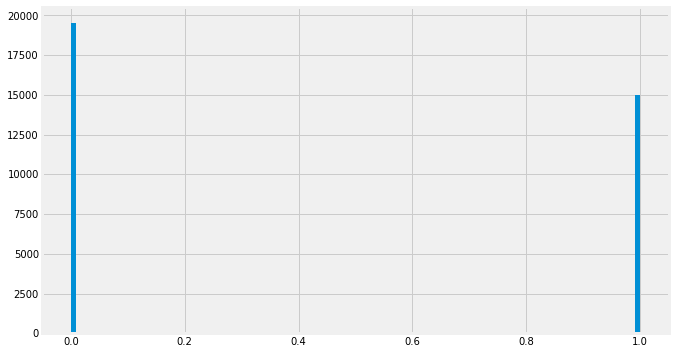

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed['RESULT_TEXT'].hist(bins=100)

A boxplot is also useful in detecting outliers.

As you can see, the price column has multiple data points that are outliers (above of the maximum in the boxplot)

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed.boxplot(column=['RESULT_TEXT'])

For categorical data, you can plot a bar chart to see whether a particular category to view the count of the categories.

Outliers in categorical data is tricky, because you have to determine whether it’s appropriate to call it an outlier based on context.

Some outliers are more obvious. Let’s say there’s an experiment done where 1000 people choose between a glass of water and a glass of milk. If the final result is 1 person who chose a glass of water, and 999 people choosing a glass of milk, that 1 person can be considered an outlier.

However, in some cases, outliers depend on context. In my example, you see that Manhattan and Brooklyn has significantly more data than Staten Island. This doesn’t count as an outlier, since Manhattan and Brooklyn has a higher housing density as compared to Staten Island.

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


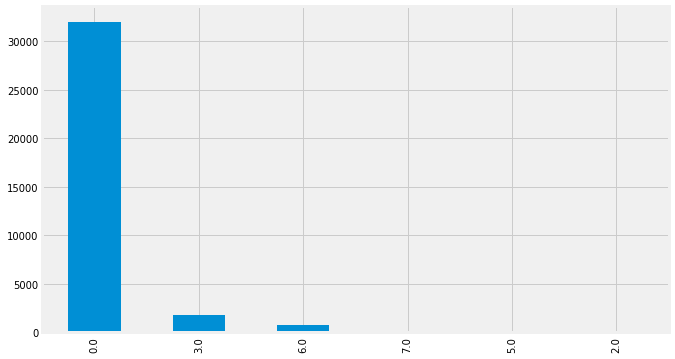

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed['DISTRICT'].value_counts().plot.bar()

**Dealing with outliers**

Dealing with outliers is similar to removing missing values, the only difference is the way you find outliers.

To categorize numerical values as outliers, there are statistical techniques like using the standard deviation and the Interquartile range. You can refer to this article for code examples to do that.

For categorical values, if they have very low frequency (like Staten island in the example above), it still may become a problem for your model. Depending on context and nature of the data, you can choose to group them into one category, for example “Others”. This way your model will be less biased and you’re not losing any information.

# **10- Data spliting**

In [ ]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [ ]:
y=MiceImputed[['RESULT_TEXT']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

# **References**

[1-Fill Missing Values in a Dataset using Python](https://thecleverprogrammer.com/2021/05/29/fill-missing-values-in-a-dataset-using-python/)

[2- Data Cleaning with Python](https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45)

[3- SMOTE using Python](https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688)

[4-Protecting your Money: Detecting Credit Card Fraud with ML/DL](https://towardsdatascience.com/protecting-your-money-detecting-credit-card-fraud-with-ml-dl-2c4a9b9a0779)

[5-How to Make Your Machine Learning Models Robust to Outliers](https://heartbeat.comet.ml/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07)

[6-What Is Encoding? And Its Importance in Data Science!](https://medium.datadriveninvestor.com/what-is-encoding-and-its-importance-in-data-science-6a2b0cce8e8e)

[7-Nominal And Ordinal Encoding In Data Science!](https://medium.com/nerd-for-tech/nominal-and-ordinal-encoding-in-data-science-c93872601f16)

[Feature Engineering for Categorical Data](https://medium.com/geekculture/feature-engineering-for-categorical-data-a77a04b3308)

[Handling Imbalanced Datasets With Oversampling Techniques. It’s Pros & Cons.](https://medium.com/analytics-vidhya/handling-imbalanced-datasets-with-oversampling-techniques-its-pros-cons-ba9f36ac5b71)

[8-Overcoming Imbalanced Dataset](https://xzz201920.medium.com/imbalanced-dataset-26732a333cf7)

[9-How to handle Categorical variables?](https://medium.com/geekculture/how-to-handle-categorical-variables-7c1ee198c55c)

[10-Five Cool Python Libraries for Data Science](https://pub.towardsai.net/five-cool-python-libraries-for-data-science-7f1fce402b90)

[Python Tricks for Data Science
](https://medium.com/analytics-vidhya/python-tricks-for-data-science-fd038ab838a)

[7 Pandas Functions Every Data Scientist Should Know](https://medium.com/trymito/7-pandas-functions-every-data-scientist-should-know-d209b1116a16)

[10 Fantastic Python Packages](https://levelup.gitconnected.com/10-fantastic-python-packages-af2a16a1183a)


[5 lesser-known Python libraries to improve your Data Science workflow](https://medium.com/ml-course-microsoft-udacity/5-lesser-known-python-libraries-to-improve-your-data-science-workflow-acc6d653f820)